/tmp/ipykernel_16570/3811129528.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_data = data.applymap(lambda x: 1 if x > threshold else 0)


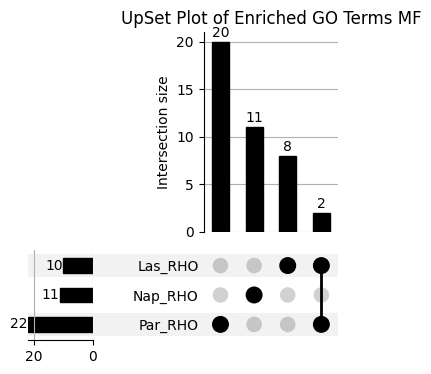

In [19]:
import pandas as pd
from upsetplot import from_indicators, plot
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/4.All_GO_Enrichment/Go_table_MF.csv")  # Replace with actual file path or use df directly

# Set GO Term as index (optional, for clarity)
df['GO Term'] = df['GO ID'] + ' ' + df['Term Name']
df.set_index('GO Term', inplace=True)

# Use only the enrichment columns
# data = df[['Las_RHO', 'Nap_RHO', 'Par_RHO', 'Las_BUSCO', 'Nap_BUSCO', 'Par_BUSCO']]
# data = df[['Las_BUSCO', 'Nap_BUSCO', 'Par_BUSCO']]
data = df[['Las_RHO', 'Nap_RHO', 'Par_RHO']]
# Apply threshold to create binary presence/absence matrix
threshold = 0  # You can change this
binary_data = data.applymap(lambda x: 1 if x > threshold else 0)
binary_data = binary_data[binary_data.any(axis=1)]
# print(binary_data)

binary_data = binary_data.astype(bool)

# Convert to UpSet-compatible format
upset_data = from_indicators(binary_data.columns.tolist(), binary_data)

# Plot
plot(upset_data, show_counts=True)
plt.title('UpSet Plot of Enriched GO Terms MF')
plt.show()

In [20]:
# shared_terms = binary_data[binary_data.all(axis=1)]
shared_terms = binary_data[binary_data.sum(axis=1) >= 2]

# Print the shared GO Terms
print("GO Terms enriched in all categories:")
print(shared_terms)

GO Terms enriched in all categories:
                               Las_RHO  Nap_RHO  Par_RHO
GO Term                                                 
GO:0042393 histone binding        True    False     True
GO:0031491 nucleosome binding     True    False     True
